<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Germany-Data" data-toc-modified-id="Germany-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Germany Data</a></span></li><li><span><a href="#Load-data,-Fit-Model" data-toc-modified-id="Load-data,-Fit-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data, Fit Model</a></span></li><li><span><a href="#Fit-and-Predict" data-toc-modified-id="Fit-and-Predict-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fit and Predict</a></span></li><li><span><a href="#Display-Actual-vs-Prediction" data-toc-modified-id="Display-Actual-vs-Prediction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Display Actual vs Prediction</a></span></li></ul></div>

## Germany Data

## Load data, Fit Model

In [2]:
import sys
from os import path
sys.path.append(path.pardir)
from src.covid import CovidCountry
import pandas as pd

# Get our Country model data
country = 'Germany'
filepath = '../data/raw/'
fixes = {'2020-03-12': 2745,
         '2020-03-23': 29056,}

de = CovidCountry(country=country,
                  filepath=filepath,
                  fixes=fixes)

de.load(today=134000)

## Fit and Predict

In [3]:
de.fit(curve='gamma')
de_df = de.predict()
de.save(filepath='../data/processed/')

In [4]:
# Show small window of prediction and actual
de_df[pd.Timestamp.now().date()-pd.Timedelta('3D'):].diff()[1:6]

,Actual,Prediction
Date,,
2020-04-12,2946.0,3930.478671
2020-04-13,2218.0,3710.562200
2020-04-14,3928.0,3489.358816
2020-04-15,NaN,3269.078770
2020-04-16,NaN,3051.676072


## Display Actual vs Prediction

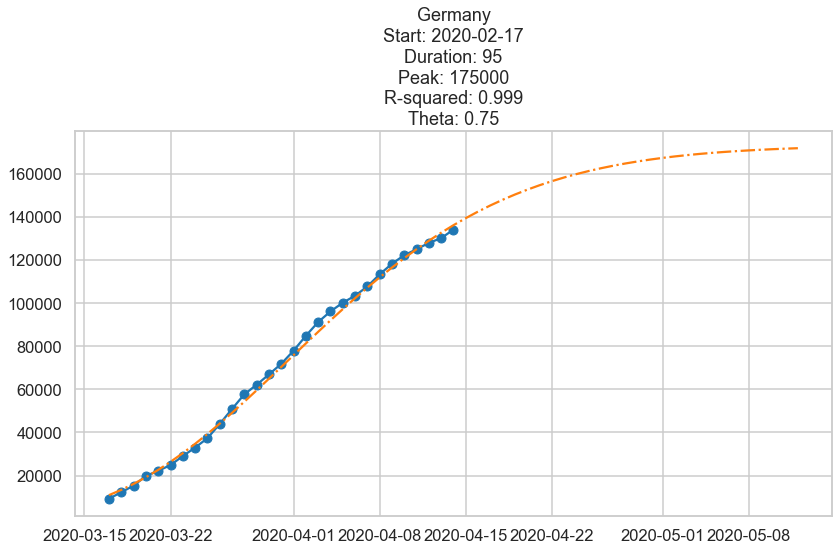

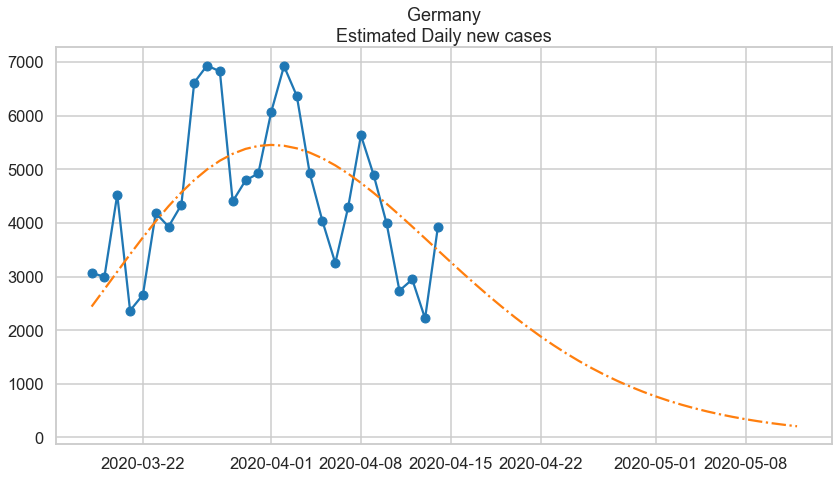

In [6]:
de.display(offset=28)